<a href="https://colab.research.google.com/github/huynhhoanghuy/MS_AdvImageProcessing/blob/main/21C11011_K31_IPCV_2021_LQN_basic_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Họ và tên: Huỳnh Hoàng Huy

MSHV: 21C11011

-------------------------------------------------------------

1) Tải ảnh và cài thư viện opencv

In [ ]:
#tải về ảnh sample
!wget http://www.ess.ic.kanagawa-it.ac.jp/std_img/colorimage/Lenna.jpg

# sử dụng phiên bản opencv 3.x
!pip install opencv-python==3.4.8.29
!pip install opencv-contrib-python==3.4.8.29

--2022-12-08 14:25:57--  http://www.ess.ic.kanagawa-it.ac.jp/std_img/colorimage/Lenna.jpg
Resolving www.ess.ic.kanagawa-it.ac.jp (www.ess.ic.kanagawa-it.ac.jp)... 202.250.66.20
Connecting to www.ess.ic.kanagawa-it.ac.jp (www.ess.ic.kanagawa-it.ac.jp)|202.250.66.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7248 (7.1K) [image/jpeg]
Saving to: ‘Lenna.jpg’

Lenna.jpg           100%[===================>]   7.08K  --.-KB/s    in 0s      

2022-12-08 14:25:58 (283 MB/s) - ‘Lenna.jpg’ saved [7248/7248]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.3 MB 1.7 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████████████

2) Import thư viện cần thiết và đọc ảnh

In [ ]:
#import các lib cần thiết, colab sẽ có sẵn một số thư viện phổ biến, nếu không có có thể cài đặt thêm
import numpy as np
import cv2 #pip install opencv-python
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

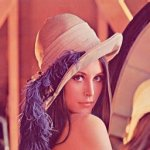

In [ ]:
# cv2.IMREAD_COLOR sẽ được giải mã theo thứ tự B G R.
img = cv2.imread('Lenna.jpg',  cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# 3) Đặc trưng màu

raw image:


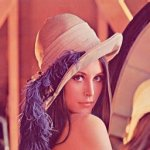

hsv image:


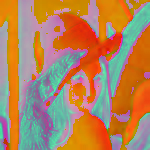

lọc lấy đuôi nón


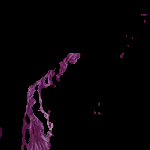

lược đồ màu


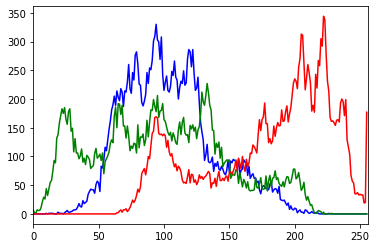

In [ ]:
image = cv2.imread('Lenna.jpg',cv2.IMREAD_UNCHANGED)
print("raw image:")
cv2_imshow(image)
## convert to hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print("hsv image:")
cv2_imshow(hsv)
## mask của đuôi nón (150, 0, 0) ~ (160, 255,255)
mask1 = cv2.inRange(hsv, (150, 0, 0), (160, 255,255))


target = cv2.bitwise_and(image,image, mask=mask1)
print("lọc lấy đuôi nón")
cv2_imshow(target)


print("lược đồ màu")
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


# 4) Đặc trưng dáng

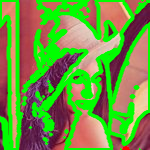

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# converting image into grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
_,contours, hierarchy = cv2.findContours(image=threshold, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results

cv2_imshow(image_copy)



# 5) Đặc trưng chuyển động

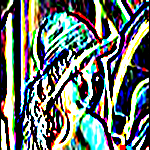

(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

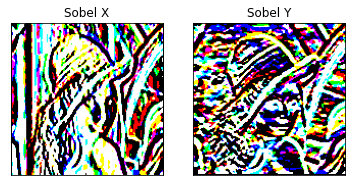

In [ ]:
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

cv2_imshow(sobelx)


plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
